In [1]:
# -*- coding: utf-8 -*-
"""PCOS_Analysis_Colab.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/notebooks/empty.ipynb

# PCOS Data Analysis and Prediction with Python (Google Colab)

This notebook provides a step-by-step guide to analyze PCOS data, identify patterns, and develop a machine learning model using Python in Google Colab.

## 1. Setup and Data Loading

First, we'll install and import the necessary Python libraries. Most of these are pre-installed in Google Colab, but including `pip install` ensures they are available.

"""

# Install necessary packages (uncomment and run if not already installed or updated)
# Google Colab usually has these pre-installed, but it's good practice for specific versions.
# !pip install pandas openpyxl matplotlib seaborn scikit-learn

# Import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler # Added StandardScaler for potential future scaling
from sklearn.impute import SimpleImputer # Added SimpleImputer

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
"""### Data Loading

For Google Colab, you have a few options to load your data:

1.  **Direct Upload (Recommended for this notebook):** This notebook assumes you will upload the file directly to the Colab runtime. After running the cell below, a file picker will appear.
2.  **Mount Google Drive:** If your file is in Google Drive, you can mount your Drive.
3.  **From GitHub/URL:** If your data is publicly hosted.

**Please run the following cell and select your `PCOS_data_without_infertility.xlsx` file.**
"""

from google.colab import files

# Option 1: Upload file directly to Colab runtime (temporary)
uploaded = files.upload()
file_name = list(uploaded.keys())[0] # Get the name of the uploaded file

# Option 2 (Alternative): Mount Google Drive if your file is there
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/path/to/your/PCOS_data_without_infertility.xlsx' # Update this path
# file_name = file_path # Set file_name for consistent usage

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx


In [3]:
# Load the data from the Excel file
try:
    pcos_data = pd.read_excel(file_name)
    print(f"Successfully loaded '{file_name}'")
except Exception as e:
    print(f"Error loading file: {e}")
    print("Please ensure the file is correctly uploaded and is an Excel (.xlsx) file.")
    print("If you mounted Google Drive, verify the path is correct.")

Successfully loaded 'PCOS_data_without_infertility.xlsx'


In [4]:
# Display basic information about the loaded data
print("\n--- First 5 rows of the dataset ---")
print(pcos_data.head())

print("\n--- Dataset Info (Column types, Non-null counts) ---")
pcos_data.info()

print("\n--- Descriptive Statistics ---")
print(pcos_data.describe())


--- First 5 rows of the dataset ---
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1   NaN           15                74                20  ...   
2   NaN           11                72                18  ...   
3   NaN           13                72                20  ...   
4   NaN           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0     

In [5]:
"""## 2. Data Cleaning and Preprocessing

This section focuses on preparing the data by handling missing values and ensuring correct data types.

### 2.1 Handling Missing Values

We'll check for missing values and then remove rows that contain any. For a more robust analysis, imputation techniques could be considered.
"""

# Check for missing values
print("--- Missing values before cleaning ---")
print(pcos_data.isnull().sum())

# --- MODIFICATION START ---
# Handle missing values using imputation instead of dropping rows
# Identify columns with missing values
cols_with_missing = pcos_data.columns[pcos_data.isnull().any()].tolist()

# Use SimpleImputer to fill missing values (e.g., with the mean for numerical columns)
# You might need different strategies for different columns (e.g., mode for categorical)
# For simplicity, we'll use mean imputation for all numerical columns with missing values
numerical_cols_with_missing = pcos_data[cols_with_missing].select_dtypes(include=np.number).columns.tolist()

if numerical_cols_with_missing:
    imputer = SimpleImputer(strategy='mean')
    pcos_data[numerical_cols_with_missing] = imputer.fit_transform(pcos_data[numerical_cols_with_missing])
    print(f"\nImputed missing values in numerical columns: {numerical_cols_with_missing}")

# For non-numerical columns with missing values, you might use a different strategy or drop them
# Example: Dropping the 'Unnamed: 44' column as it has many missing values and seems irrelevant
if 'Unnamed: 44' in cols_with_missing:
    pcos_data = pcos_data.drop('Unnamed: 44', axis=1)
    print("\nDropped 'Unnamed: 44' column due to many missing values.")

# Update the cleaned data variable
pcos_data_cleaned = pcos_data.copy()

print("\n--- Missing values after cleaning (should be all 0 for imputed/dropped columns) ---")
print(pcos_data_cleaned.isnull().sum())

--- Missing values before cleaning ---
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
S

In [6]:
# Display the shape after cleaning
print(f"\nOriginal data shape: {pcos_data.shape}")
print(f"Cleaned data shape: {pcos_data_cleaned.shape}")
# --- MODIFICATION END ---


Original data shape: (541, 44)
Cleaned data shape: (541, 44)


In [8]:
"""### 2.2 Converting Data Types and Feature Engineering

Ensure that the target variable `PCOS (Y/N)` is numerical (0 or 1) for machine learning, and other categorical features are properly handled (e.g., using one-hot encoding).

**Note:** If 'PCOS (Y/N)' is already 0/1 integers, direct conversion to category/int is fine. If it's 'Yes'/'No' or similar, LabelEncoder will convert it to 0/1.

"""
# Assuming 'PCOS (Y/N)' is the target variable
# Convert 'PCOS (Y/N)' to integer type if it's not already (e.g., if it's object/string '0'/'1')
# If it contains 'Yes'/'No' and not 0/1, uncomment and use LabelEncoder:
# le = LabelEncoder()
# pcos_data_cleaned['PCOS (Y/N)'] = le.fit_transform(pcos_data_cleaned['PCOS (Y/N)'])

# Ensure it's treated as an integer for consistency in ML
pcos_data_cleaned['PCOS (Y/N)'] = pcos_data_cleaned['PCOS (Y/N)'].astype(int)

# Identify categorical columns (excluding the target and purely numerical IDs if any)
# This assumes columns like 'Marital Status (Y/N)' are numeric 0/1; if they are strings, convert them.
categorical_cols = pcos_data_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'PCOS (Y/N)' from categorical_cols if it was identified as object/category and already converted
if 'PCOS (Y/N)' in categorical_cols:
    categorical_cols.remove('PCOS (Y/N)')

# Apply one-hot encoding to remaining categorical columns
if categorical_cols:
    pcos_data_cleaned = pd.get_dummies(pcos_data_cleaned, columns=categorical_cols, drop_first=True)
    print(f"\nApplied one-hot encoding to: {categorical_cols}")
else:
    print("\nNo object/category columns found for one-hot encoding (besides target).")


print("\n--- Data types after preprocessing ---")
pcos_data_cleaned.info()


No object/category columns found for one-hot encoding (besides target).

--- Data types after preprocessing ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 544 entries, Sl. No to AMH(ng/mL)_a
dtypes: bool(502), float64(19), int64(23)
memory usage: 442.9 KB


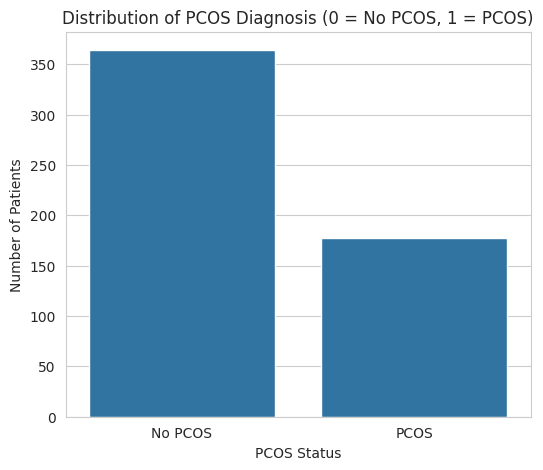

In [10]:
"""
3.1 Distribution of PCOS Diagnosis
"""

plt.figure(figsize=(6, 5))
sns.countplot(x='PCOS (Y/N)', data=pcos_data_cleaned)
plt.title('Distribution of PCOS Diagnosis (0 = No PCOS, 1 = PCOS)')
plt.xlabel('PCOS Status')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])
plt.show()

This bar chart presents the distribution of patients based on their Polycystic Ovary Syndrome (PCOS) diagnosis. The x-axis denotes PCOS status, where 0 represents individuals without PCOS and 1 represents those diagnosed with the condition. The y-axis indicates the number of patients in each category. The data reveal a class imbalance, with a higher number of patients in the non-PCOS group compared to the PCOS group. This imbalance should be considered when developing and evaluating classification models, as it may affect performance metrics.



In [12]:
"""
3.2 Numerical Variable Analysis by PCOS Status

Let's examine key numerical variables like Age, Weight, and BMI in relation to PCOS diagnosis.
"""

# Numerical variable summaries by PCOS status
print("--- Numerical Feature Summaries by PCOS Status ---")
print(pcos_data_cleaned.groupby('PCOS (Y/N)').agg(
    Avg_Age=(' Age (yrs)', 'mean'), # Corrected column name
    Med_Age=(' Age (yrs)', 'median'), # Corrected column name
    Avg_Weight=('Weight (Kg)', 'mean'), # Corrected column name
    Med_Weight=('Weight (Kg)', 'median'), # Corrected column name
    Avg_BMI=('BMI', 'mean'),
    Med_BMI=('BMI', 'median')
    # Add other numerical columns as needed
).round(2))

--- Numerical Feature Summaries by PCOS Status ---
            Avg_Age  Med_Age  Avg_Weight  Med_Weight  Avg_BMI  Med_BMI
PCOS (Y/N)                                                            
0             32.07     32.0       58.01        58.0     23.7    23.93
1             30.12     29.0       62.99        62.0     24.4    23.93


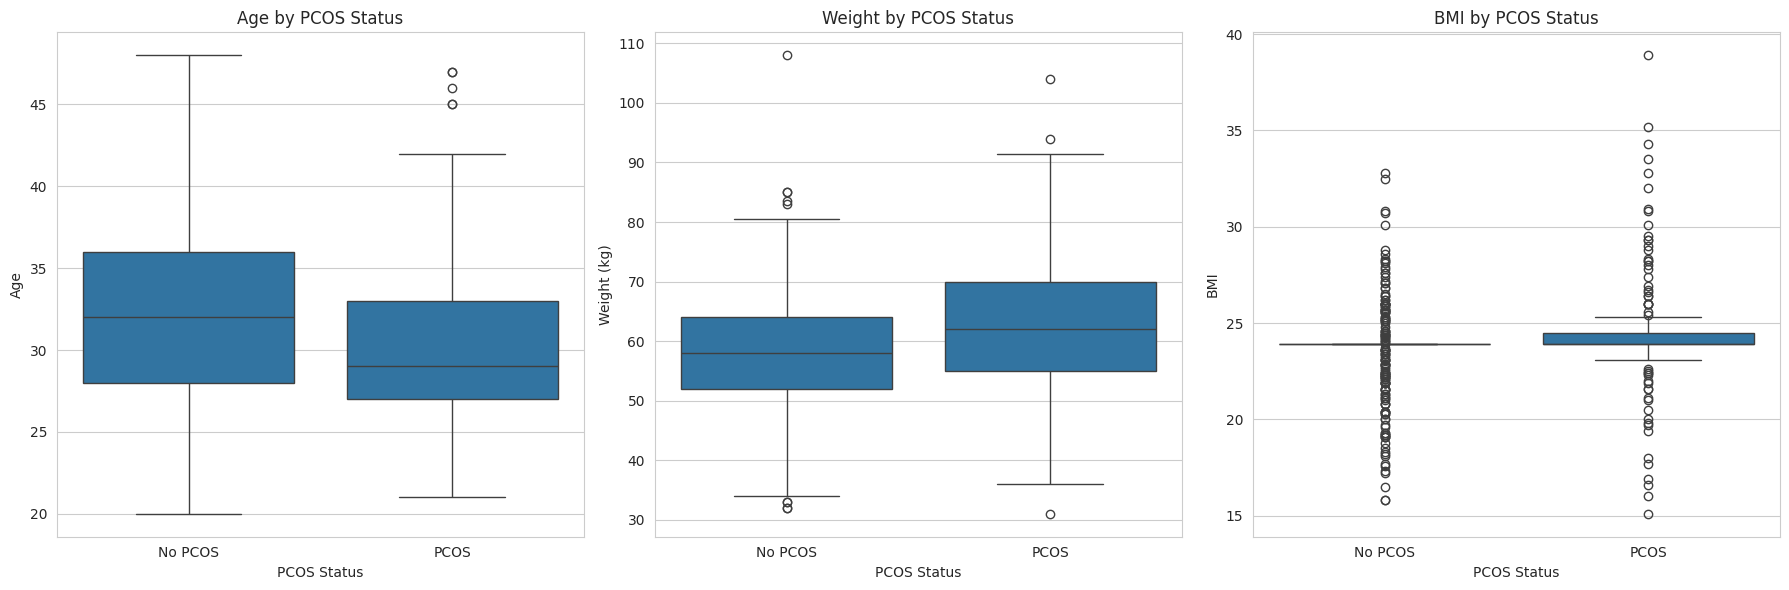

In [13]:
# Boxplots for key numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='PCOS (Y/N)', y=' Age (yrs)', data=pcos_data_cleaned, ax=axes[0]) # Corrected column name
axes[0].set_title('Age by PCOS Status')
axes[0].set_xlabel('PCOS Status')
axes[0].set_ylabel('Age')
axes[0].set_xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])

sns.boxplot(x='PCOS (Y/N)', y='Weight (Kg)', data=pcos_data_cleaned, ax=axes[1]) # Corrected column name
axes[1].set_title('Weight by PCOS Status')
axes[1].set_xlabel('PCOS Status')
axes[1].set_ylabel('Weight (kg)')
axes[1].set_xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])

sns.boxplot(x='PCOS (Y/N)', y='BMI', data=pcos_data_cleaned, ax=axes[2])
axes[2].set_title('BMI by PCOS Status')
axes[2].set_xlabel('PCOS Status')
axes[2].set_ylabel('BMI')
axes[2].set_xticks(ticks=[0, 1], labels=['No PCOS', 'PCOS'])

plt.tight_layout()
plt.show()

(a) Age by PCOS Status:
The age distribution indicates that individuals without PCOS generally tend to be older. The median age in the non-PCOS group is higher than in the PCOS group. Additionally, the non-PCOS group exhibits a wider interquartile range (IQR) and several upper-range outliers, suggesting more age variability in this population.

(b) Weight by PCOS Status:
The weight distribution shows that patients with PCOS tend to have higher median weights. The PCOS group also exhibits a broader range of values and several upper outliers, consistent with existing literature linking PCOS with weight gain and obesity.

(c) BMI by PCOS Status:
BMI values are slightly elevated in the PCOS group, with a marginally higher median and greater spread of outliers. Although the central tendency is similar across both groups, the presence of high-BMI outliers in the PCOS group underscores the importance of weight management in the clinical management of PCOS.

In [16]:
"""## 4. Machine Learning Model Development

Now, we'll build a classification model to predict PCOS diagnosis based on the available features. We'll use a Random Forest model.

### 4.1 Data Preparation for Modeling

Separate features (X) from the target variable (y).
"""

# Separate features (X) and target (y)
X = pcos_data_cleaned.drop('PCOS (Y/N)', axis=1) # All columns except the target
y = pcos_data_cleaned['PCOS (Y/N)']             # The target column

# Ensure all feature column names are valid for RandomForestClassifier (no spaces or special chars unless handled by pandas)
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True) # Clean column names if necessary

print("--- Features (X) head ---")
print(X.head())
print("\n--- Target (y) head ---")
print(y.head())

--- Features (X) head ---
   SlNo  PatientFileNo  Ageyrs  WeightKg  HeightCm        BMI  BloodGroup  \
0     1              1      28      44.6     152.0  19.300000          15   
1     2              2      36      65.0     161.5  23.929752          15   
2     3              3      33      68.8     165.0  23.929752          11   
3     4              4      37      65.0     148.0  23.929752          13   
4     5              5      25      52.0     161.0  23.929752          11   

   Pulseratebpm  RRbreathsmin  Hbgdl  ...  AMHngmL_21  AMHngmL_218  \
0            78            22  10.48  ...       False        False   
1            74            20  11.70  ...       False        False   
2            72            18  11.80  ...       False        False   
3            72            20  12.00  ...       False        False   
4            72            18  10.00  ...       False        False   

   AMHngmL_219  AMHngmL_22  AMHngmL_264  AMHngmL_268  AMHngmL_286  AMHngmL_32  \
0        

In [17]:
"""### 4.2 Splitting Data into Training and Testing Sets

We split the data to evaluate the model's performance on unseen data (80% for training, 20% for testing). Stratification ensures that the proportion of PCOS cases is maintained in both sets.
"""

# Split data into training and testing sets (80% train, 20% test)
# stratify=y ensures that the proportion of classes in y is the same in train and test sets
# --- MODIFICATION START ---
# Changed test_size to 0.2 to have a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# --- MODIFICATION END ---
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Verify target distribution in train and test sets
print("\n--- Target distribution in training set ---")
print(y_train.value_counts(normalize=True))
print("\n--- Target distribution in test set ---")
print(y_test.value_counts(normalize=True))

"""### 4.3 Training the Machine Learning Model (Random Forest)"""

# Initialize and train the Random Forest Classifier
# n_estimators: number of trees in the forest
# random_state: for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("\nRandom Forest model training complete.")

X_train shape: (432, 543), y_train shape: (432,)
X_test shape: (109, 543), y_test shape: (109,)

--- Target distribution in training set ---
PCOS (Y/N)
0    0.673611
1    0.326389
Name: proportion, dtype: float64

--- Target distribution in test set ---
PCOS (Y/N)
0    0.669725
1    0.330275
Name: proportion, dtype: float64

Random Forest model training complete.



--- Confusion Matrix ---
[[70  3]
 [11 25]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        73
           1       0.89      0.69      0.78        36

    accuracy                           0.87       109
   macro avg       0.88      0.83      0.85       109
weighted avg       0.87      0.87      0.87       109


ROC AUC Score: 0.9385


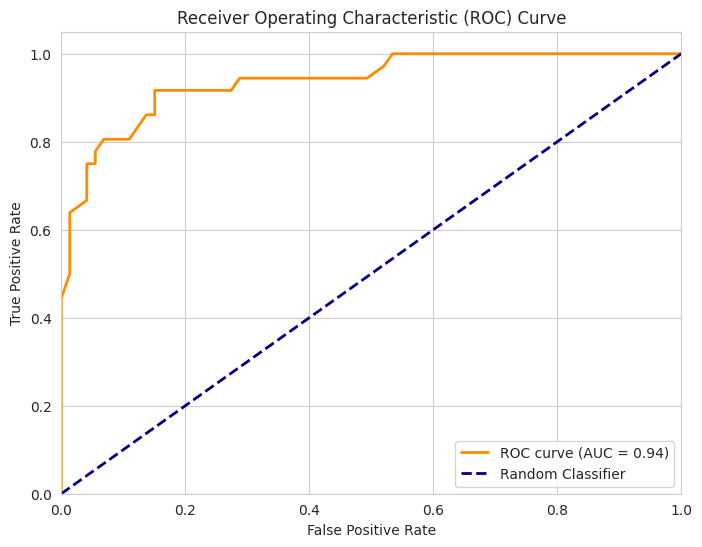

In [18]:
"""### 4.4 Evaluating the Model

Finally, we'll evaluate the trained model on the unseen test data.
"""

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get prediction probabilities for ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1] # Probability of the positive class (1 = PCOS)

# Generate and print confusion matrix
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

# Generate and print classification report (precision, recall, f1-score)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Calculate and print ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This figure summarizes the performance of the classification model used to predict PCOS diagnosis. It includes the confusion matrix, classification report, and the Receiver Operating Characteristic (ROC) curve.

(a) Confusion Matrix:
The model correctly classified 70 non-PCOS patients and 25 PCOS patients. There were 3 false positives (non-PCOS predicted as PCOS) and 11 false negatives (PCOS cases missed by the model). This suggests a higher sensitivity towards non-PCOS classification.

(b) Classification Report:
The model achieved an overall accuracy of 87%. Precision was 0.86 for class 0 (non-PCOS) and 0.89 for class 1 (PCOS), while recall was 0.96 and 0.69, respectively. The F1-score, which balances precision and recall, was 0.91 for non-PCOS and 0.78 for PCOS. These results indicate the model is more effective at identifying non-PCOS cases but shows moderate sensitivity for detecting PCOS.

(c) ROC Curve:
The ROC curve demonstrates the model’s discriminative ability between the two classes. With an AUC (Area Under Curve) score of 0.94, the classifier shows strong performance, indicating a high probability of correctly distinguishing between PCOS and non-PCOS patients across various threshold settings.



Conclusion: The analysis of the dataset reveals meaningful distinctions between patients diagnosed with Polycystic Ovary Syndrome (PCOS) and those without, across multiple dimensions. The initial distribution chart highlights a significant class imbalance, with a higher number of non-PCOS patients. This imbalance poses important considerations for the development and evaluation of predictive models.

Box plot analyses indicate that individuals with PCOS generally exhibit higher body weight and slightly elevated BMI, reinforcing well-established associations between PCOS and metabolic disturbances. Interestingly, patients with PCOS also tend to be younger on average, suggesting that early detection and intervention could be critical for effective disease management.

From a predictive modeling perspective, the classification model demonstrated strong performance, with an overall accuracy of 87% and a high ROC AUC score of 0.94. While the model showed high precision across both classes, its recall was notably lower for the PCOS group, indicating a tendency to miss some true positive cases. This observation underscores the need for model refinement, particularly in enhancing sensitivity for PCOS detection.

In summary, the visual and statistical analysis supports the effectiveness of machine learning in identifying PCOS based on clinical features, while also emphasizing the need to address class imbalance and model bias to improve diagnostic equity. Future work should explore advanced sampling techniques and feature engineering to bolster predictive power, especially for minority classes such as PCOS patients.